# Feature Engineering
# Proyecto: Predicción de Ventas

**Autor:** Javier Gacitúa  
**Fecha:** Octubre 2025

---

## Objetivos

1. Crear nuevas variables derivadas de las existentes
2. Transformar variables para mejorar el modelo
3. Generar características temporales
4. Crear interacciones entre variables
5. Preparar datos para modelado

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Librerías importadas correctamente")

 Librerías importadas correctamente


## 1. Cargar Datos Procesados

In [2]:
# Importar módulos propios
import sys
sys.path.append('../src')
from data_loader import DataLoader
from feature_engineering import FeatureEngineer

# Inicializar
loader = DataLoader(data_dir='../data')
engineer = FeatureEngineer()

# Cargar datos (reemplazar con tu dataset)
# df = loader.load_local_csv('sales_explored.csv', directory='processed')

# Datos de ejemplo
np.random.seed(42)
df = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=1000, freq='D'),
    'sales': np.random.normal(1000, 200, 1000) + np.linspace(0, 500, 1000),
    'store_id': np.random.randint(1, 11, 1000),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], 1000),
    'price': np.random.uniform(10, 100, 1000),
    'promotion': np.random.choice([0, 1], 1000),
    'customers': np.random.randint(10, 200, 1000)
})

print(f" Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

 Dataset cargado: 1000 filas, 7 columnas


,date,sales,store_id,product_category,price,promotion,customers
0,2023-01-01,1099.342831,7,Books,62.493174,0,191
1,2023-01-02,972.847640,1,Electronics,85.800767,0,58
2,2023-01-03,1130.538709,8,Food,59.408240,1,153
3,2023-01-04,1306.107473,3,Clothing,29.734657,0,139
4,2023-01-05,955.171327,6,Books,13.030226,1,69


## 2. Características Temporales

In [3]:
# Crear características de fecha
df = engineer.create_date_features(df, 'date')

# Visualizar nuevas características
print("\n Nuevas características temporales:")
date_features = [col for col in df.columns if 'date_' in col]
df[date_features].head(10)


 Creando características de fecha desde: date
 Creadas 9 características de fecha

 Nuevas características temporales:


,date_year,date_month,date_day,date_dayofweek,date_quarter,date_weekofyear,date_is_weekend,date_is_month_start,date_is_month_end
0,2023,1,1,6,1,52,1,1,0
1,2023,1,2,0,1,1,0,0,0
2,2023,1,3,1,1,1,0,0,0
3,2023,1,4,2,1,1,0,0,0
4,2023,1,5,3,1,1,0,0,0
5,2023,1,6,4,1,1,0,0,0
6,2023,1,7,5,1,1,1,0,0
7,2023,1,8,6,1,1,1,0,0
8,2023,1,9,0,1,2,0,0,0
9,2023,1,10,1,1,2,0,0,0


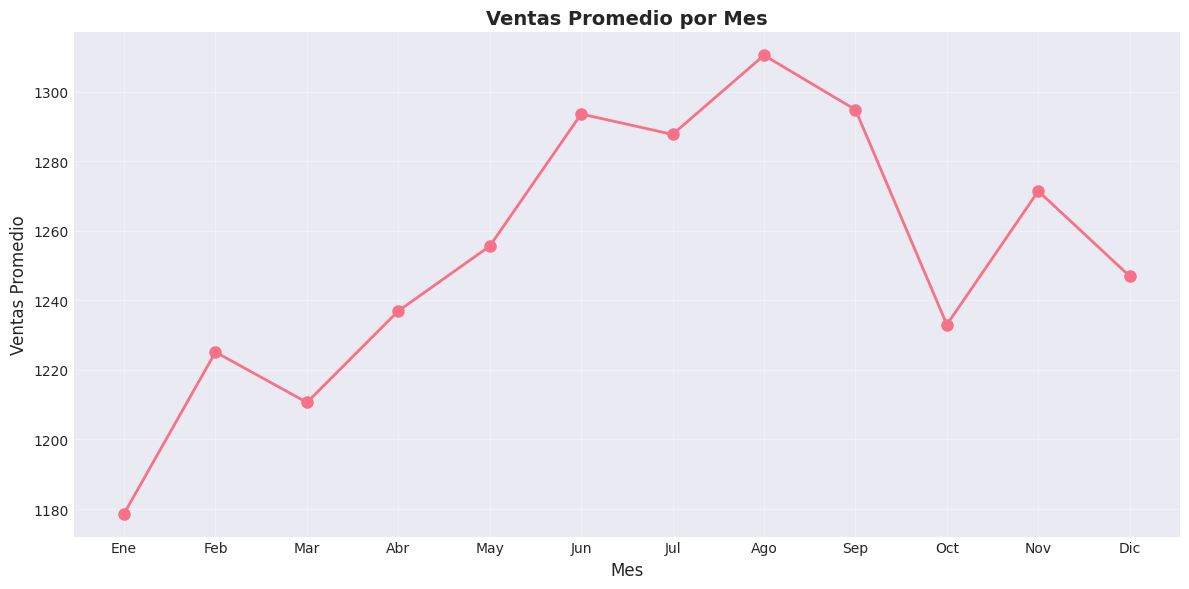

In [4]:
# Análisis de ventas por mes
monthly_sales = df.groupby('date_month')['sales'].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.title('Ventas Promedio por Mes', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Lag Features (Características de Rezago)

In [5]:
# Crear lag features para ventas
df = df.sort_values('date').reset_index(drop=True)
df = engineer.create_lag_features(df, 'sales', lags=[1, 7, 14, 30])

# Visualizar lag features
print("\n Lag Features creadas:")
lag_cols = [col for col in df.columns if 'lag' in col]
df[['date', 'sales'] + lag_cols].head(35)


 Creando lag features para: sales
 Creados 4 lag features

 Lag Features creadas:


,date,sales,sales_lag_1,sales_lag_7,sales_lag_14,sales_lag_30
0,2023-01-01,1099.342831,NaN,NaN,NaN,NaN
1,2023-01-02,972.847640,1099.342831,NaN,NaN,NaN
2,2023-01-03,1130.538709,972.847640,NaN,NaN,NaN
3,2023-01-04,1306.107473,1130.538709,NaN,NaN,NaN
4,2023-01-05,955.171327,1306.107473,NaN,NaN,NaN
5,2023-01-06,955.675111,955.171327,NaN,NaN,NaN
6,2023-01-07,1318.845566,955.675111,NaN,NaN,NaN
7,2023-01-08,1156.990449,1318.845566,1099.342831,NaN,NaN
8,2023-01-09,910.109127,1156.990449,972.847640,NaN,NaN
9,2023-01-10,1113.016513,910.109127,1130.538709,NaN,NaN


In [ ]:
# Correlación de lag features con ventas
lag_cols_full = ['sales'] + lag_cols
lag_corr = df[lag_cols_full].corr()['sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
lag_corr[1:].plot(kind='barh', color='steelblue')
plt.xlabel('Correlación con Ventas', fontsize=12)
plt.title('Correlación de Lag Features con Ventas', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n Correlación de Lag Features:")
print(lag_corr)

## 4. Rolling Features (Ventana Móvil)

In [6]:
# Crear rolling features
df = engineer.create_rolling_features(df, 'sales', windows=[7, 14, 30])

# Visualizar rolling features
print("\n Rolling Features creadas:")
rolling_cols = [col for col in df.columns if 'rolling' in col]
df[['date', 'sales'] + rolling_cols[:4]].head(35)


 Creando rolling features para: sales
 Creados 12 rolling features

 Rolling Features creadas:


,date,sales,sales_rolling_mean_7,sales_rolling_std_7,sales_rolling_max_7,sales_rolling_min_7
0,2023-01-01,1099.342831,NaN,NaN,NaN,NaN
1,2023-01-02,972.847640,NaN,NaN,NaN,NaN
2,2023-01-03,1130.538709,NaN,NaN,NaN,NaN
3,2023-01-04,1306.107473,NaN,NaN,NaN,NaN
4,2023-01-05,955.171327,NaN,NaN,NaN,NaN
5,2023-01-06,955.675111,NaN,NaN,NaN,NaN
6,2023-01-07,1318.845566,1105.504094,157.621589,1318.845566,955.171327
7,2023-01-08,1156.990449,1113.739468,158.747980,1318.845566,955.171327
8,2023-01-09,910.109127,1104.776823,169.439287,1318.845566,910.109127
9,2023-01-10,1113.016513,1102.273652,169.124406,1318.845566,910.109127


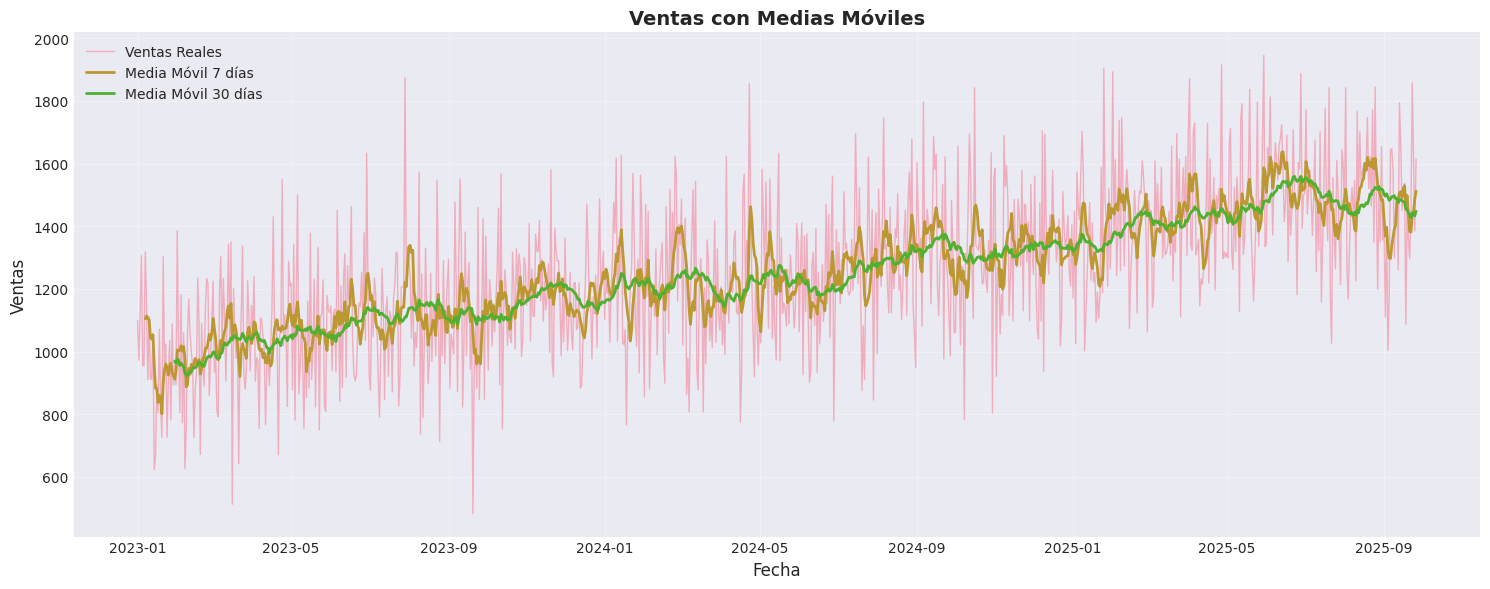

In [7]:
# Visualizar media móvil
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['sales'], label='Ventas Reales', alpha=0.5, linewidth=1)
plt.plot(df['date'], df['sales_rolling_mean_7'], label='Media Móvil 7 días', linewidth=2)
plt.plot(df['date'], df['sales_rolling_mean_30'], label='Media Móvil 30 días', linewidth=2)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.title('Ventas con Medias Móviles', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Características de Agregación

In [8]:
# Crear agregaciones por tienda
if 'store_id' in df.columns:
    df = engineer.create_aggregation_features(df, 'store_id', 'sales', 
                                             agg_funcs=['mean', 'sum', 'std'])
    
    print("\n Features de agregación por tienda:")
    agg_cols = [col for col in df.columns if 'store_id_sales' in col]
    df[['store_id', 'sales'] + agg_cols].head(10)


 Creando características de agregación: store_id -> sales
 Creadas 3 características de agregación

 Features de agregación por tienda:


## 6. Características de Interacción

In [ ]:
# Crear interacciones entre variables numéricas clave
interaction_cols = ['price', 'promotion', 'customers']
df = engineer.create_interaction_features(df, interaction_cols)

print("\n Features de interacción creadas:")
interaction_features = [col for col in df.columns if '_x_' in col or '_div_' in col]
print(f"Total: {len(interaction_features)} features")
df[interaction_features].head()

## 7. Características Polinómicas

In [ ]:
# Crear features polinómicas para price
df = engineer.create_polynomial_features(df, ['price'], degree=2)

print("\n Features polinómicas creadas:")
poly_cols = [col for col in df.columns if '_pow_' in col]
df[['price'] + poly_cols].head()

## 8. Codificación de Variables Categóricas

In [ ]:
# Codificar categoría de producto
from sklearn.preprocessing import LabelEncoder

if 'product_category' in df.columns:
    le = LabelEncoder()
    df['product_category_encoded'] = le.fit_transform(df['product_category'])
    
    # Mostrar mapeo
    print("\n Codificación de Categorías:")
    print("=" * 40)
    for idx, category in enumerate(le.classes_):
        print(f"{idx}: {category}")
    
    # Alternativamente: One-Hot Encoding
    df_onehot = pd.get_dummies(df, columns=['product_category'], prefix='category')
    print(f"\n One-Hot Encoding: {len([c for c in df_onehot.columns if 'category_' in c])} columnas creadas")

## 9. Limpieza Final

In [ ]:
# Eliminar filas con NaN generadas por lag/rolling features
print(f" Filas antes de limpieza: {len(df)}")
df_clean = df.dropna()
print(f" Filas después de limpieza: {len(df_clean)}")
print(f" Filas eliminadas: {len(df) - len(df_clean)}")

# Eliminar columna de fecha (ya tenemos sus componentes)
if 'date' in df_clean.columns:
    df_clean = df_clean.drop('date', axis=1)
    print(" Columna 'date' eliminada")

print(f"\n Dataset final: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")

## 10. Resumen de Features Creadas

In [ ]:
# Mostrar resumen
engineer.get_feature_summary()

# Información del dataset final
print("\n" + "=" * 70)
print(" DATASET FINAL PARA MODELADO")
print("=" * 70)
print(f"\nDimensiones: {df_clean.shape[0]:,} filas x {df_clean.shape[1]} columnas")
print(f"\nColumnas:")
for col in df_clean.columns:
    print(f"  - {col} ({df_clean[col].dtype})")

In [ ]:
# Correlación con target después de feature engineering
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

if 'sales' in df_clean.columns:
    sales_corr = df_clean[numeric_cols].corr()['sales'].sort_values(ascending=False)
    
    # Top 15 correlaciones
    top_corr = sales_corr.head(16)[1:]  # Excluir la correlación consigo mismo
    
    plt.figure(figsize=(10, 8))
    top_corr.plot(kind='barh', color='teal')
    plt.xlabel('Correlación con Ventas', fontsize=12)
    plt.title('Top 15 Features más Correlacionadas con Ventas', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\n Top 15 Features más correlacionadas:")
    print(top_corr)

## 11. Guardar Dataset Procesado

In [ ]:
# Guardar dataset final
output_path = '../data/processed/sales_engineered.csv'
# df_clean.to_csv(output_path, index=False)
print(f" Dataset guardado en: {output_path}")

# Resumen final
print("\n" + "=" * 70)
print(" FEATURE ENGINEERING COMPLETADO")
print("=" * 70)
print(f"\n Total de features: {df_clean.shape[1]}")
print(f" Features nuevas creadas: {len(engineer.created_features)}")
print(f" Dataset listo para modelado")
print("\n Próximo paso: 03_Modeling.ipynb")
print("=" * 70)